In [ ]:
pip install split_folders

In [ ]:
import splitfolders

In [ ]:
input = "/content/drive/MyDrive/project -3 (chess)/Chess"
splitfolders.ratio(input,output="/content/drive/MyDrive/project -3 (chess)/dataset",
                   seed=43,ratio=(.8,.2),
                   group_prefix=None)

Copying files: 651 files [00:59, 10.86 files/s]


In [ ]:
import cv2

In [ ]:

input = "/content/drive/MyDrive/project -3 (chess)/Chess"
im = cv2.imread('/content/drive/MyDrive/project -3 (chess)/dataset/train/knight-resize/00000001_resized.jpg')


In [ ]:
input=im.shape
img_width=im.shape[0]
img_height=im.shape[1]


In [ ]:
#New Tensorflow model
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters = 16, kernel_size =2 , activation = 'relu',input_shape = (224,224,3)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(filters = 16, kernel_size =2 , activation = 'relu' ),
    tf.keras.layers.MaxPool2D(pool_size=2),

    tf.keras.layers.Conv2D(filters = 32, kernel_size =2 , activation = 'relu' ),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 64, kernel_size =2 , activation = 'relu' ),
    tf.keras.layers.MaxPool2D(pool_size=2),


    tf.keras.layers.Conv2D(filters = 128, kernel_size =2 , activation = 'relu' ),
    tf.keras.layers.MaxPool2D(pool_size=2),



    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(512,activation="relu"),

    tf.keras.layers.Dense(5,activation="softmax"),


])

model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 223, 223, 16)      208       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 111, 111, 16)      0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 110, 110, 16)      1040      
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 55, 55, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 54, 54, 32)        2080      
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 27, 27, 32)       

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
loss = 'categorical_crossentropy',
metrics=['accuracy'])

In [ ]:
# this is the data augmentation configuration we will use for training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1. / 255)
batch_size =32
train_data_dir="/content/drive/MyDrive/project -3 (chess)/dataset/train"
validation_data_dir="/content/drive/MyDrive/project -3 (chess)/dataset/val"
img_width = 224
img_height = 224

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 519 images belonging to 5 classes.
Found 198 images belonging to 5 classes.


In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=16, #number of batches per epoch
    epochs=25,
    validation_data= validation_generator,
    validation_steps= 6 , #Number of batchses per validation
    batch_size=32


)

Epoch 1/25
16/16 [==============================] - 26s 2s/step - loss: 1.6120 - accuracy: 0.2587 - val_loss: 1.5869 - val_accuracy: 0.2708
Epoch 2/25
16/16 [==============================] - 24s 1s/step - loss: 1.5682 - accuracy: 0.2710 - val_loss: 1.5794 - val_accuracy: 0.2656
Epoch 3/25
16/16 [==============================] - 27s 2s/step - loss: 1.5535 - accuracy: 0.2916 - val_loss: 1.5250 - val_accuracy: 0.3177
Epoch 4/25
16/16 [==============================] - 23s 1s/step - loss: 1.5378 - accuracy: 0.3429 - val_loss: 1.4989 - val_accuracy: 0.3281
Epoch 5/25
16/16 [==============================] - 26s 2s/step - loss: 1.4043 - accuracy: 0.4415 - val_loss: 1.4095 - val_accuracy: 0.4427
Epoch 6/25
16/16 [==============================] - 26s 2s/step - loss: 1.3430 - accuracy: 0.4682 - val_loss: 1.4063 - val_accuracy: 0.4219
Epoch 7/25
16/16 [==============================] - 24s 2s/step - loss: 1.2950 - accuracy: 0.4702 - val_loss: 1.2896 - val_accuracy: 0.5156
Epoch 8/25
16/16 [==

In [ ]:


import numpy as np


import cv2

from PIL import Image


path = ("/content/drive/MyDrive/project -3 (chess)/dataset/train/pawn_resized/00000001_resized.jpg")

img = Image.open(path)



new_size = (224, 224)
im = img.resize(new_size)




img = np.array(im) / 255.

img.shape

img = img[np.newaxis, ...]




array([[[[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        ...,

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]],

        [[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]]])

In [ ]:
np.sort(model.predict(img))

1/1 [==============================] - 0s 57ms/step


array([[1.2916436e-06, 3.7994050e-06, 4.2390944e-05, 5.7785744e-03,
        9.9417394e-01]], dtype=float32)

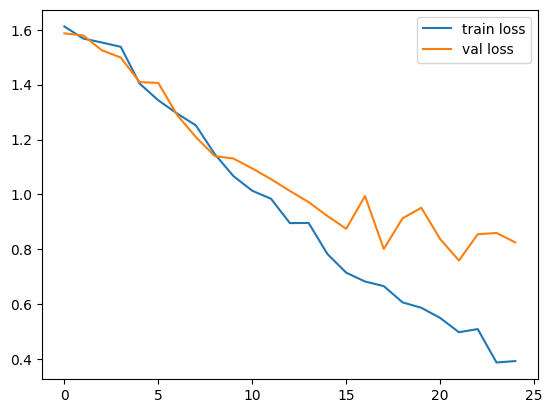

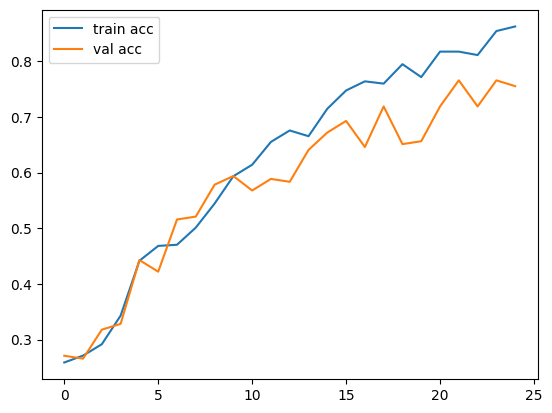

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')


plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig("AccVall_acc")

In [ ]:
model.save("/content/drive/MyDrive/project -3 (chess)/save.h5")